This notebook corresponds to the Preliminary Approach section of the report. We consider decision tree and support vector machine, which both output a binary classification of 0 or 1, signifying drop or not dropped.

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from helper import *

import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, datasets

In [2]:
with open('useful_courses.pkl', 'rb') as f:
    eng_filtered_exams = pickle.load(f)

In [9]:
decision_tree_in_sample_diff = []
decision_tree_out_sample_diff = []
svm_in_sample_diff = []
svm_out_sample_diff = []

In [10]:
for course in eng_filtered_exams:
    # 1. Data preparation
    course_df = feature_engineer(course)
    x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",    
                                                                         past_sems = ["fa22", "sp22"])
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

    # 2. Decision Tree
    tree = DecisionTreeClassifier() #default: Gini impurity
    tree.fit(x_train, y_train)
    decision_tree_in_sample_diff.append(np.sum(tree.predict(x_train)) - np.sum(y_train))
    decision_tree_out_sample_diff.append(np.sum(tree.predict(x_test)) - np.sum(y_test))

    # 3. SVM 
    svc = svm.SVC(kernel='rbf', C=10, gamma=1).fit(x_train, y_train)
    svm_in_sample_diff.append(np.sum(svc.predict(x_train)) - np.sum(y_train))
    svm_out_sample_diff.append(np.sum(svc.predict(x_test)) - np.sum(y_test))

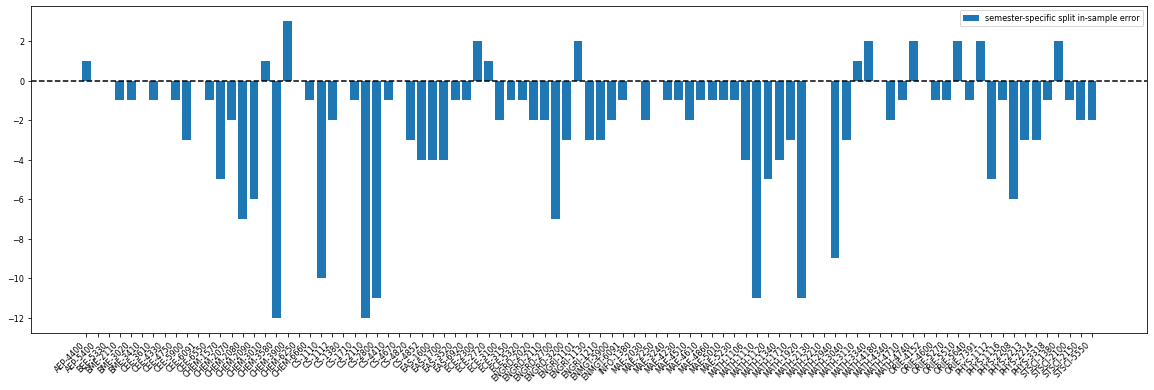

In [11]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(decision_tree_out_sample_diff),
        align = 'center', label = 'Random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend()

In [12]:
print(f'Decision Tree Mean Squared Error (MSE) is \
      {np.mean(np.array(decision_tree_out_sample_diff)**2)}')

Decision Tree Mean Squared Error (MSE) is       14.824175824175825


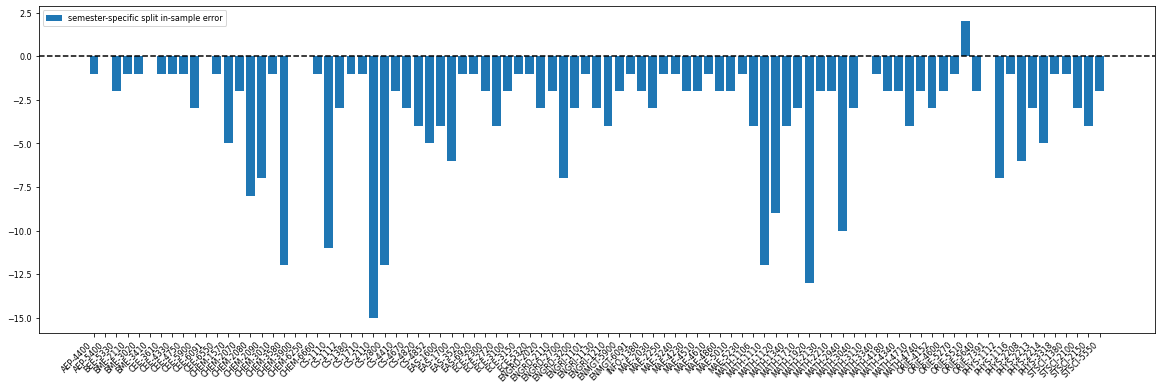

In [13]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(svm_out_sample_diff),
        align = 'center', label = 'Random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend()

### Figure making

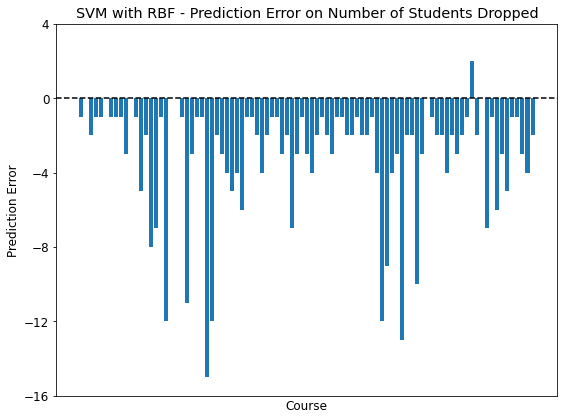

In [32]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.axhline(y=0, color='black', linestyle='--')
plt.bar(eng_filtered_exams, np.array(svm_out_sample_diff), align = 'center')
plt.yticks(np.arange(-16,8,4))
plt.title('SVM with RBF - Prediction Error on Number of Students Dropped')
plt.ylabel('Prediction Error')
plt.xlabel('Course')
plt.xticks([])
plt.tight_layout()
plt.savefig('figures/svm-random.png', dpi=100);

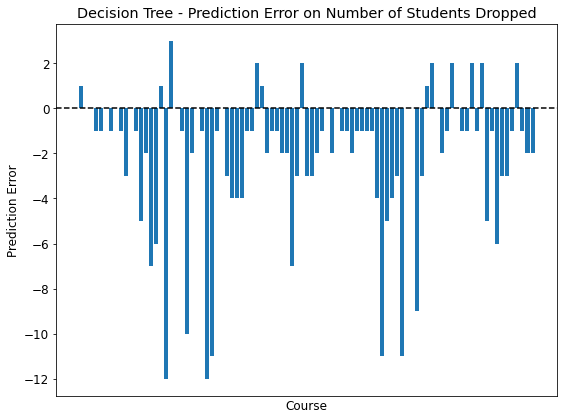

In [33]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.axhline(y=0, color='black', linestyle='--')
plt.bar(eng_filtered_exams, np.array(decision_tree_out_sample_diff), align = 'center')
plt.title('Decision Tree - Prediction Error on Number of Students Dropped')
plt.ylabel('Prediction Error')
plt.xlabel('Course')
plt.xticks([])
plt.tight_layout()
plt.savefig('figures/decisionTree-random.png', dpi=100);

### Hypterparameter Tuning for SVM

In [6]:
Cs = [0.1, 10, 1000]
gammas = [1, 0.01, 0.0001]
kernels = ['rbf','linear','sigmoid']

In [7]:
results_in = {}
results_out = {}
counter = 0
for c in Cs:
    for g in gammas:
        for k in kernels:
            svm_in_sample_diff = []
            svm_out_sample_diff = []
            for course in eng_filtered_exams:
                # 1. Data preparation
                course_df = feature_engineer(course)
                x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",    
                                                                                    past_sems = ["fa22", "sp22"])
                X = np.concatenate((x_train, x_test))
                y = np.concatenate((y_train, y_test))
                x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

                # 2. SVM 
                svc = svm.SVC(kernel=k, C=c, gamma=g).fit(x_train, y_train)
                svm_in_sample_diff.append(np.sum(svc.predict(x_train)) - np.sum(y_train))
                svm_out_sample_diff.append(np.sum(svc.predict(x_test)) - np.sum(y_test))
            results_out[(k, c, g)] = np.mean(np.array(svm_out_sample_diff)**2)
            results_in[(k, c, g)] = np.mean(np.array(svm_in_sample_diff)**2)
            counter += 1
            print(f"finished {counter}")

finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27


In [8]:
results_out

{('rbf', 0.1, 1): 39.30769230769231,
 ('linear', 0.1, 1): 39.2967032967033,
 ('sigmoid', 0.1, 1): 39.30769230769231,
 ('rbf', 0.1, 0.01): 39.30769230769231,
 ('linear', 0.1, 0.01): 39.2967032967033,
 ('sigmoid', 0.1, 0.01): 39.30769230769231,
 ('rbf', 0.1, 0.0001): 39.30769230769231,
 ('linear', 0.1, 0.0001): 39.2967032967033,
 ('sigmoid', 0.1, 0.0001): 39.30769230769231,
 ('rbf', 10, 1): 20.13186813186813,
 ('linear', 10, 1): 38.472527472527474,
 ('sigmoid', 10, 1): 39.30769230769231,
 ('rbf', 10, 0.01): 39.30769230769231,
 ('linear', 10, 0.01): 38.472527472527474,
 ('sigmoid', 10, 0.01): 39.30769230769231,
 ('rbf', 10, 0.0001): 39.30769230769231,
 ('linear', 10, 0.0001): 38.472527472527474,
 ('sigmoid', 10, 0.0001): 39.30769230769231,
 ('rbf', 1000, 1): 20.13186813186813,
 ('linear', 1000, 1): 38.48351648351648,
 ('sigmoid', 1000, 1): 39.30769230769231,
 ('rbf', 1000, 0.01): 32.604395604395606,
 ('linear', 1000, 0.01): 38.48351648351648,
 ('sigmoid', 1000, 0.01): 39.30769230769231,
 

We find out that ('rbf', 1000, 1) and ('rbf', 10, 1) have the best performance in terms of out of sample MSE.